http://ithelp.ithome.com.tw/articles/10187191

# 建立決策樹分類器

決策樹分類器（Decision Tree Classifiers）是可以處理多元分類問題的演算法，我們最喜歡她的地方有兩點：

+ 可以同時處理連續型與類別型變數。
+ 不需要進行太多的資料預處理（Preprocessing），
> 像是在建立 Logistic 迴歸前得將 Sex 變數創造成 dummy variables，但是決策樹分類器不需要。

我們使用 scikit-learn 機器學習套件的其中一個玩具資料（Toy datasets）鳶尾花資料，

利用花瓣（Petal）的長和寬跟花萼（Sepal）的長和寬來預測花的種類，

藉此練習使用決策樹演算法建立一個三元分類器。

我們使用 sklearn.tree 的 DecisionTreeClassifier() 方法。

我們也會開始使用 sklearn.cross_validation 的 train_test_split() 

方法來將鳶尾花資料很便利地切分為訓練與測試資料，這是很常會使用的資料預處理方法，

透過前述的 train_test_split() 方法，我們可以用一行程式完成。

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cross_validation import train_test_split

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 建立分類器
clf = tree.DecisionTreeClassifier()
iris_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

[1 2 0 2 2 0 0 1 2 0 2 2 1 2 0 1 1 2 2 1 0 2 1 0 0 1 0 2 0 0 2 1 0 2 1 1 2
 2 2 1 0 1 2 2 2]
[1 2 0 2 2 0 0 1 2 0 2 2 1 2 0 1 1 2 2 1 0 2 1 0 0 1 0 2 0 0 2 1 0 1 1 1 2
 2 2 1 0 1 2 2 2]


C:\Users\po390\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 決策樹分類器的績效

我們使用準確率（Accuracy）作為分類演算法的績效。

我們使用 sklearn.metrics 的 accuracy_score() 方法計算準確率。

In [3]:
from sklearn import metrics
# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.977777777778


# 建立 k-Nearest Neighbors 分類器

k-Nearest Neighbors 分類器同樣也是可以處理多元分類問題的演算法，

由於是以距離作為未知類別的資料點分類依據，

必須要將類別變數轉換為 dummy variables 然後將所有的數值型變數標準化，

避免因為單位不同，在距離的計算上失真。

我們使用 sklearn.neighbors 的 KNeighborsClassifier() 方法，預設 k = 5。

In [5]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 建立分類器
clf = neighbors.KNeighborsClassifier()
iris_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

[2 1 0 0 2 0 2 0 2 2 1 2 2 0 1 0 2 1 0 2 1 2 0 1 1 1 1 2 2 1 2 2 2 2 1 1 0
 1 0 0 2 2 2 0 0]
[2 1 0 0 2 0 2 0 1 2 1 2 2 0 1 0 2 1 0 2 1 2 0 1 1 1 1 2 2 1 2 2 2 2 1 1 0
 1 0 0 2 2 2 0 0]


# 如何選擇 k

讓程式幫我們怎麼選擇一個適合的 k，通常 k 的上限為訓練樣本數的 20%。

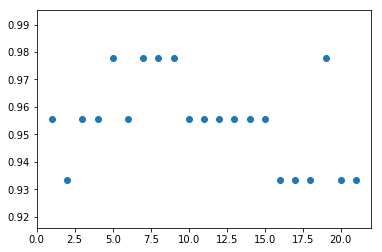

5


In [6]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 選擇 k
range = np.arange(1, round(0.2 * train_X.shape[0]) + 1)
accuracies = []

for i in range:
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    iris_clf = clf.fit(train_X, train_y)
    test_y_predicted = iris_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)

# 視覺化
plt.scatter(range, accuracies)
plt.show()
appr_k = accuracies.index(max(accuracies)) + 1
print(appr_k)